**`=> importing the dependencies`**

In [118]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

**`=> data collection`**

In [11]:
# loading the dataset
df= pd.read_csv("wine.csv")

In [13]:
# read the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
# number rows and columns
df.shape

(1599, 12)

In [17]:
# check the dataset has null value or not
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**`=> data analysis and visulization`**

In [20]:
# statistical measure of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


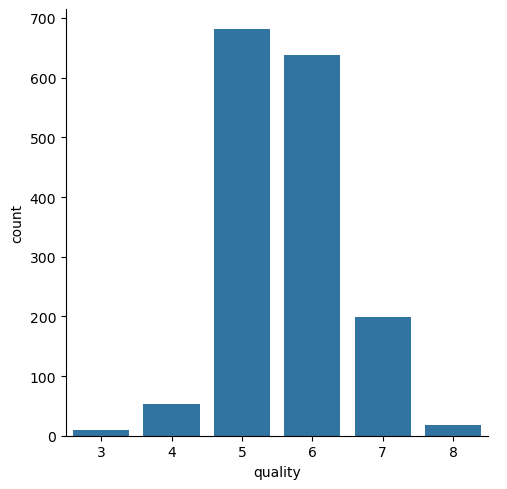

In [26]:
# number of value for each quality
sns.catplot(x= "quality", data= df, kind= "count")

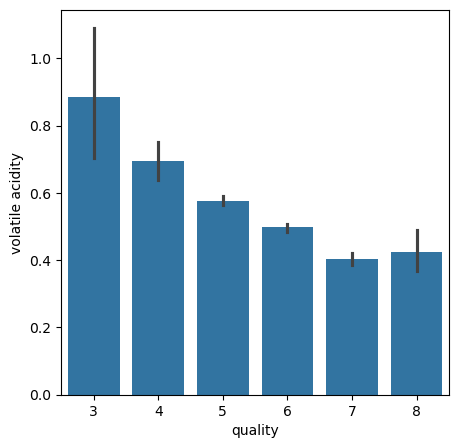

In [28]:
# volatile  acidity vs quality
plot= plt.figure(figsize= (5,5))
sns.barplot(x= "quality", y= "volatile acidity", data= df)
plt.show()

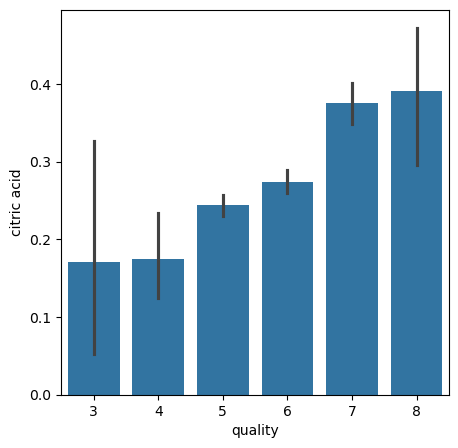

In [50]:
# citric acid vs quality
plt.figure(figsize= (5,5))
sns.barplot(x= "quality", y= "citric acid", data= df)
plt.show()

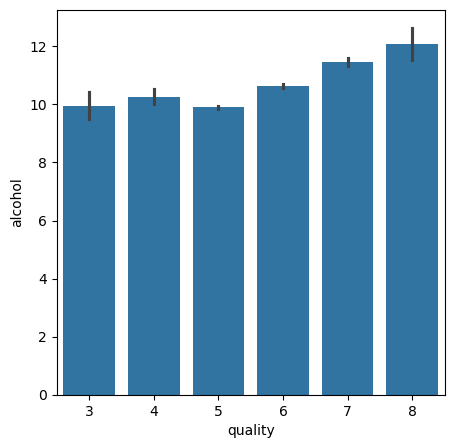

In [56]:
# citric acid vs volatile acidity
plt.figure(figsize= (5,5))
sns.barplot(x= "quality", y= "alcohol", data= df)
plt.show()

**`=> correlation`**

In [63]:
correlation= df.corr()

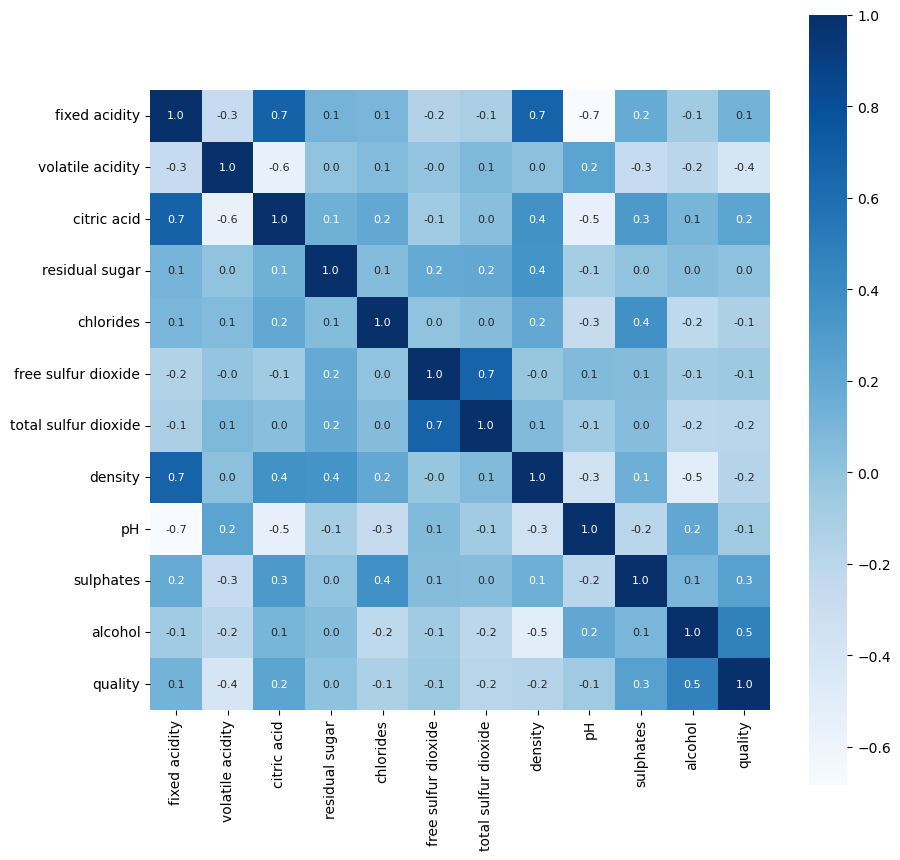

In [69]:
# construct the heatmap to understand correlation between columns
plt.figure(figsize= (10, 10))
sns.heatmap(correlation, cbar= True, square= True, fmt= ".1f", annot= True, annot_kws= {"size": 8}, cmap= "Blues")
plt.show()

**`=> data preprocessing`**

In [72]:
X= df.drop(columns= "quality", axis= 1)

In [76]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**`=> label binarization`**

In [79]:
df.value_counts("quality")

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [81]:
Y= df["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [83]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


**`=> train and test splitting`**

In [86]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state= 42, stratify= Y)

In [88]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


**`=> model training: random forest`**

In [94]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

**`=> evaluate our model`**

In [101]:
# check the accuracy on train data
train_pred= rf.predict(X_train)
train_accuracy= accuracy_score(train_pred, Y_train)
print(train_accuracy)

1.0


In [103]:
# check the accuracy on test data
test_pred= rf.predict(X_test)
test_accuracy= accuracy_score(test_pred, Y_test)
print(test_accuracy)

0.94375


**`=> make prediction system`**

In [120]:
input= (7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5)

input_array= np.array(input)

input_reshape= input_array.reshape(1, -1)

prediction= rf.predict(input_reshape)
print(prediction)

if prediction[0] == 0:
    print("Wine quality is not good")
else:
    print("Wine qaulity is good")

[1]
Wine qaulity is good
